응답하라 AI 시즌3 - 2주차(2018-07-18)

학습목표
1. 데이터를 이해한다.
2. 탐색적 데이터 분석(EDA)을 이해하고 적용한다.

참고자료
1. https://youtu.be/Q_MbN-vu_2w (자전거 수요 예측[1/4] 캐글 머신러닝 탐색적 데이터 분석)
2. https://statkclee.github.io/ml/ml-eda.html (탐색적 데이터 분석(EDA))
3. https://github.com/reply-ai/Group1_ML/blob/master/JKim_dataset_analysis.ipynb (정원님의 데이터 분석)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
train = pd.read_csv("data/crypto-markets.csv", parse_dates=["date"])
train.shape

(785024, 13)

In [6]:
# train.columns
# train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785024 entries, 0 to 785023
Data columns (total 13 columns):
slug           785024 non-null object
symbol         785024 non-null object
name           785024 non-null object
date           785024 non-null datetime64[ns]
ranknow        785024 non-null int64
open           785024 non-null float64
high           785024 non-null float64
low            785024 non-null float64
close          785024 non-null float64
volume         785024 non-null float64
market         785024 non-null float64
close_ratio    785024 non-null float64
spread         785024 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 77.9+ MB


In [7]:
train.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [8]:
print("Latest crypto data")
latest_train = train[train['date'] == max(train['date'])]
latest_train.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1865,bitcoin,BTC,Bitcoin,2018-06-06,1,7625.970000,7680.430000,7502.010000,7653.980000,4.692260e+09,1.302330e+11,0.8518,178.42
2900,ethereum,ETH,Ethereum,2018-06-06,2,610.260000,611.640000,596.400000,607.120000,1.756530e+09,6.096070e+10,0.7034,15.24
4668,ripple,XRP,Ripple,2018-06-06,3,0.677901,0.681668,0.660059,0.674797,2.739660e+08,2.660190e+10,0.6820,0.02
4987,bitcoin-cash,BCH,Bitcoin Cash,2018-06-06,4,1157.330000,1157.330000,1107.210000,1131.170000,6.085030e+08,1.986880e+10,0.4781,50.12
5328,eos,EOS,EOS,2018-06-06,5,14.250000,14.260000,13.480000,13.940000,1.022290e+09,1.277380e+10,0.5897,0.78


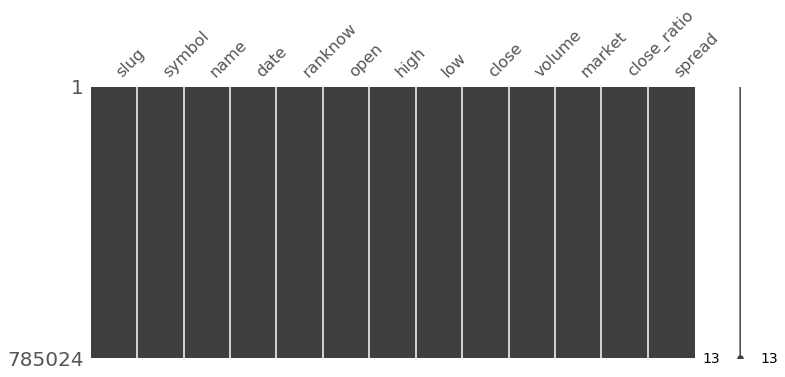

In [9]:
import missingno as msno

msno.matrix(train, figsize=(12, 5))

In [10]:
train.close_ratio.describe()

count    7.850240e+05
mean             -inf
std               NaN
min              -inf
25%      1.552000e-01
50%      4.342000e-01
75%      7.586000e-01
max      1.000000e+00
Name: close_ratio, dtype: float64

In [11]:
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day

In [12]:
train.shape

(785024, 16)

In [13]:
train.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,year,month,day
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88,2013,4,28
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49,2013,4,29
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88,2013,4,30
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17,2013,5,1
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32,2013,5,2


In [14]:
corrMatt = train[["open", "high", "low", "close", "volume", "market", "close_ratio", "spread"]]
corrMatt = corrMatt.corr()
print(corrMatt)

                 open      high       low     close    volume    market  \
open         1.000000  0.967526  0.971012  0.956207  0.010411  0.011398   
high         0.967526  1.000000  0.947080  0.971402  0.008690  0.009458   
low          0.971012  0.947080  1.000000  0.971565  0.012038  0.013291   
close        0.956207  0.971402  0.971565  1.000000  0.010470  0.011448   
volume       0.010411  0.008690  0.012038  0.010470  1.000000  0.896761   
market       0.011398  0.009458  0.013291  0.011448  0.896761  1.000000   
close_ratio -0.000680  0.000100  0.000750  0.003606  0.009434  0.008828   
spread       0.750289  0.864099  0.656807  0.758528  0.001537  0.001378   

             close_ratio    spread  
open           -0.000680  0.750289  
high            0.000100  0.864099  
low             0.000750  0.656807  
close           0.003606  0.758528  
volume          0.009434  0.001537  
market          0.008828  0.001378  
close_ratio     1.000000 -0.000940  
spread         -0.000940  1.

In [15]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

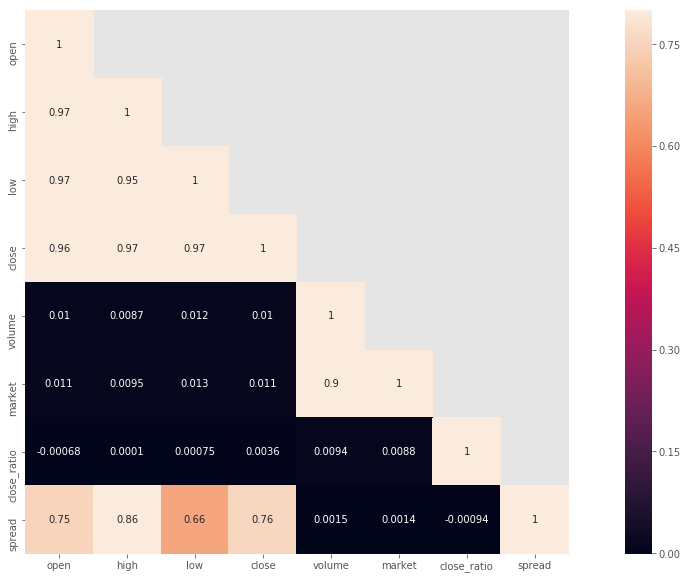

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

In [17]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

In [18]:
train["year_month"] = train["date"].apply(concatenate_year_month)

print(train.shape)
train[["date", "year_month"]].head()

(785024, 17)


,date,year_month
0,2013-04-28,2013-4
1,2013-04-29,2013-4
2,2013-04-30,2013-4
3,2013-05-01,2013-5
4,2013-05-02,2013-5


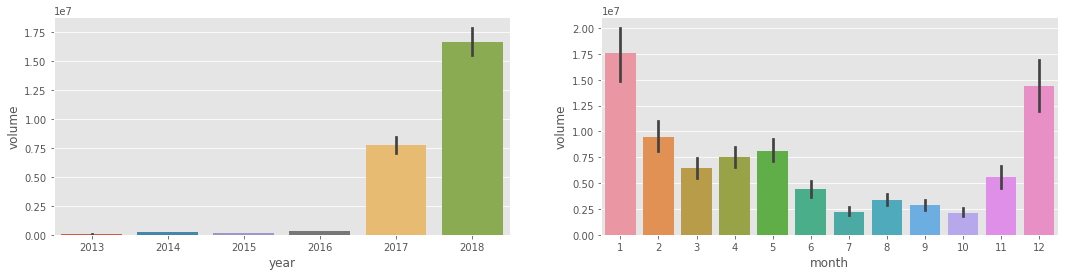

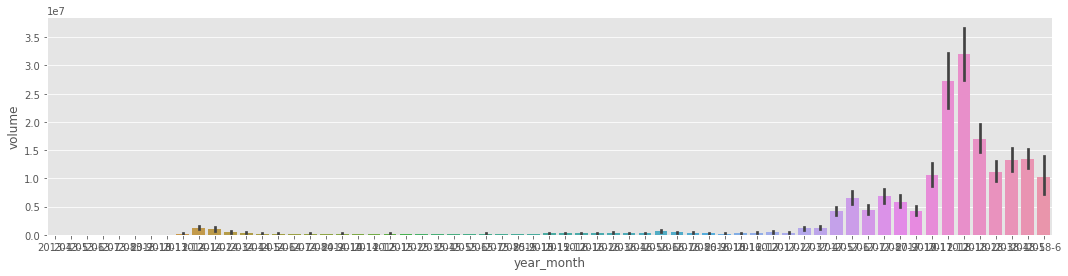

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year", y="volume", ax=ax1)
sns.barplot(data=train, x="month", y="volume", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year_month", y="volume", ax=ax3)

https://www.kaggle.com/hassanaftab/time-series-analysis-closing-market

Importance of date in Time Series

The data contains a particular date and prices on that date. But this is still not read as a TimeSeries object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [22]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [23]:
cm = pd.read_csv("data/crypto-markets.csv", parse_dates=["date"], index_col='date', date_parser=dateparse)
cm.dtypes

slug            object
symbol          object
name            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

We can also explicitly convert to datetime using dataframe[columnName] = dataframe.to_datetime[columnName]

you can read more about it on following link

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

In [24]:
dm = pd.read_csv('data/crypto-markets.csv')  
dm['date'] = pd.to_datetime(dm['date'])

In [34]:
cmopen=cm.iloc[:1000,4]
cmhigh=cm.iloc[:1000,5]
cmlow=cm.iloc[:1000,6]
cmclose=cm.iloc[:1000,7]

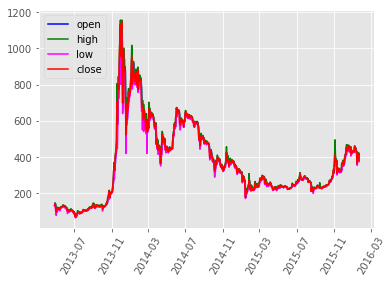

In [35]:
plt.plot(cmopen, color='blue', label='open')
plt.plot(cmhigh, color='green', label='high')
plt.plot(cmlow, color='magenta', label='low')
plt.plot(cmclose, color='red', label='close')

plt.legend(loc='upper left')

plt.xticks(rotation=60)

plt.show()

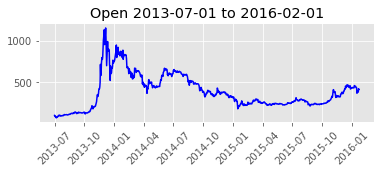

In [37]:
view = cmopen['2013-07-01':'2016-02-01']
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Open 2013-07-01 to 2016-02-01')
plt.plot(view,color ='blue')

In [44]:
cm_open_ma=pd.Series(cmopen).rolling(window=20, center=False).mean()

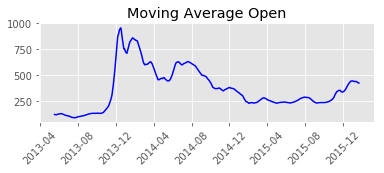

In [45]:
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('Moving Average Open')
plt.plot(cm_open_ma,color ='blue')

In [47]:
# Get a df containing only the latest date's data for each currency
print("Latest crypto data")
latest_dm = dm[dm['date'] == max(dm['date'])]
latest_dm.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1865,bitcoin,BTC,Bitcoin,2018-06-06,1,7625.970000,7680.430000,7502.010000,7653.980000,4.692260e+09,1.302330e+11,0.8518,178.42
2900,ethereum,ETH,Ethereum,2018-06-06,2,610.260000,611.640000,596.400000,607.120000,1.756530e+09,6.096070e+10,0.7034,15.24
4668,ripple,XRP,Ripple,2018-06-06,3,0.677901,0.681668,0.660059,0.674797,2.739660e+08,2.660190e+10,0.6820,0.02
4987,bitcoin-cash,BCH,Bitcoin Cash,2018-06-06,4,1157.330000,1157.330000,1107.210000,1131.170000,6.085030e+08,1.986880e+10,0.4781,50.12
5328,eos,EOS,EOS,2018-06-06,5,14.250000,14.260000,13.480000,13.940000,1.022290e+09,1.277380e+10,0.5897,0.78


In [49]:
x = 10
latest_dm[latest_dm['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5              [EOS]
6         [Litecoin]
7          [Stellar]
8          [Cardano]
9             [IOTA]
10            [TRON]
Name: name, dtype: object

In [56]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

C:\Users\User\Anaconda3\envs\py35cu90tf-reply-ai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


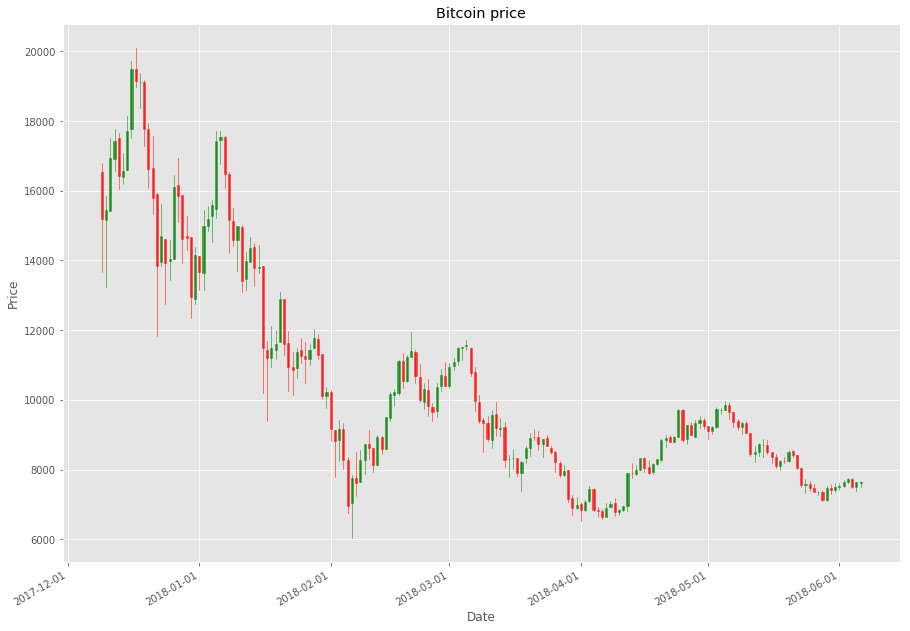

In [57]:
# Candlestick chart for Rank 1 currency (limited to 6 Months)# Candle 
rank = 1    # Indicates 'Bitcoin'
months = 6

name = dm[dm.ranknow == rank].iloc[-1]['name']
filtered_dm = dm[(dm['ranknow'] == rank) & (dm['date'] > (max(dm['date']) - timedelta(days=30*months)))]
OHLCfiltered_dm = filtered_dm[['date','open','high','low','close']]
OHLCfiltered_dm['date'] = mdates.date2num(OHLCfiltered_dm['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_dm.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()